In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = tf.keras.datasets.boston_housing

In [3]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [4]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [7]:
scaler = StandardScaler()

In [8]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

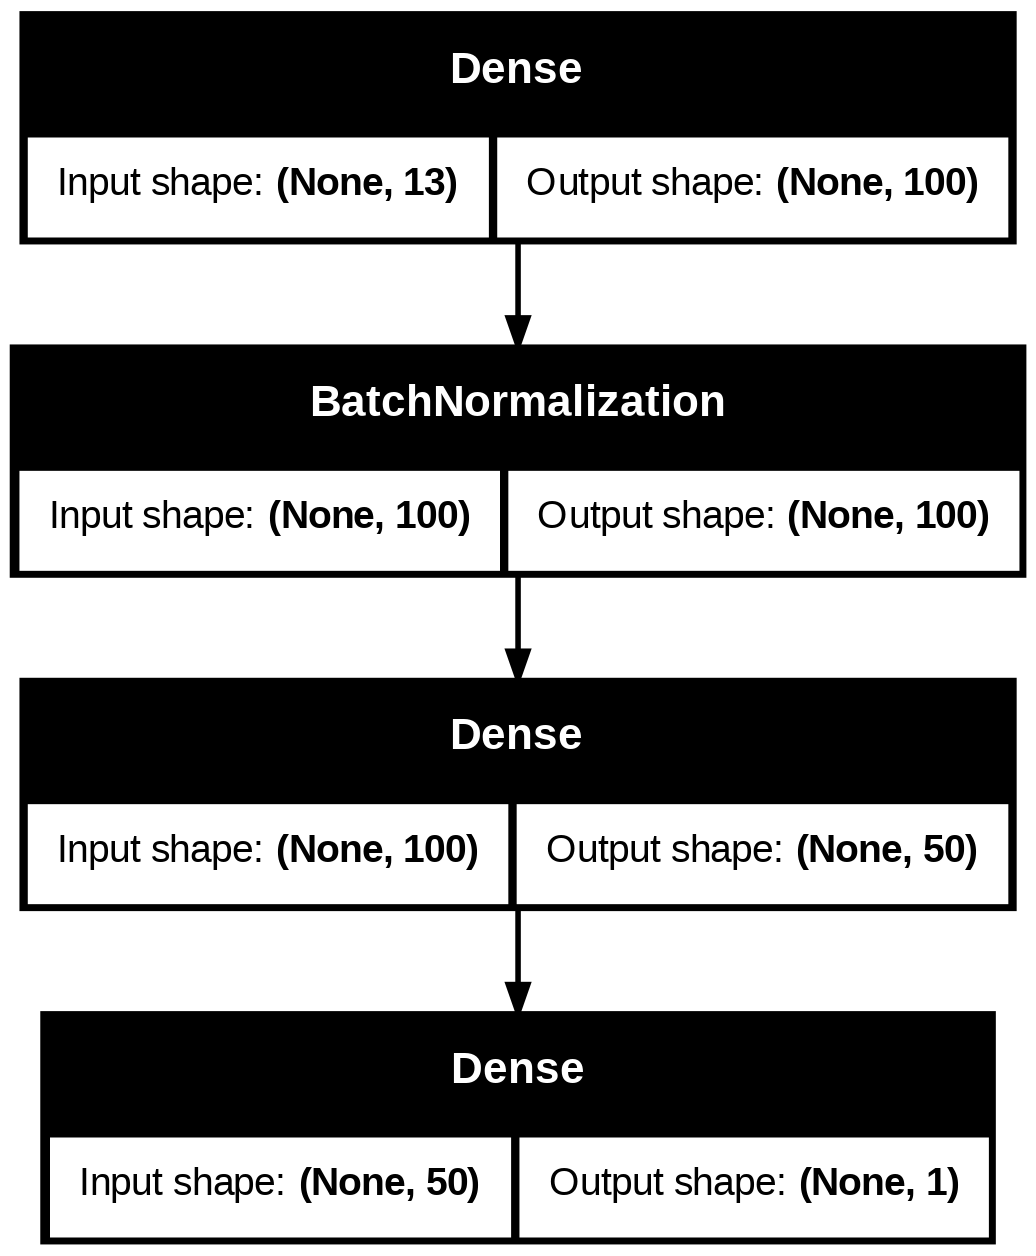

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-4 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [14]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 587.0841 - mae: 22.4176 - val_loss: 1839.1086 - val_mae: 39.9451
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 554.3715 - mae: 22.0173 - val_loss: 710.6611 - val_mae: 24.8265
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 529.1156 - mae: 21.7429 - val_loss: 841.1459 - val_mae: 27.5890
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 502.6949 - mae: 20.8349 - val_loss: 745.6983 - val_mae: 26.1098
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 475.3654 - mae: 20.6114 - val_loss: 702.2888 - val_mae: 25.4671
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 400.0852 - mae: 18.9258 - val_loss: 655.1006 - val_mae: 24.6497
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 316.6923 - mae: 16.7208 - val_loss: 337.5071 - val_mae: 17.4138
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 233.5491 - mae: 14.2038 - val_loss: 163.2286 - val_mae: 11.5220
Epoch 9/20
13/13 ━━

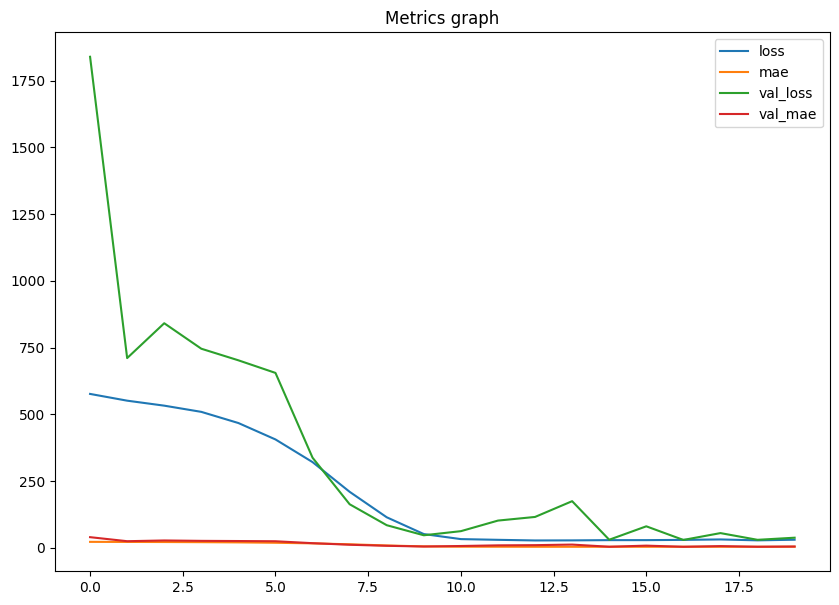

In [15]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [16]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


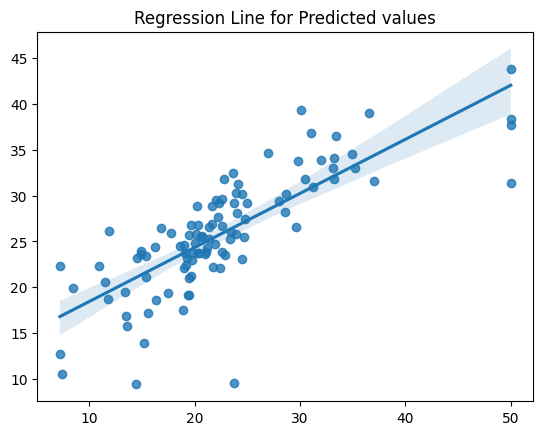

In [17]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

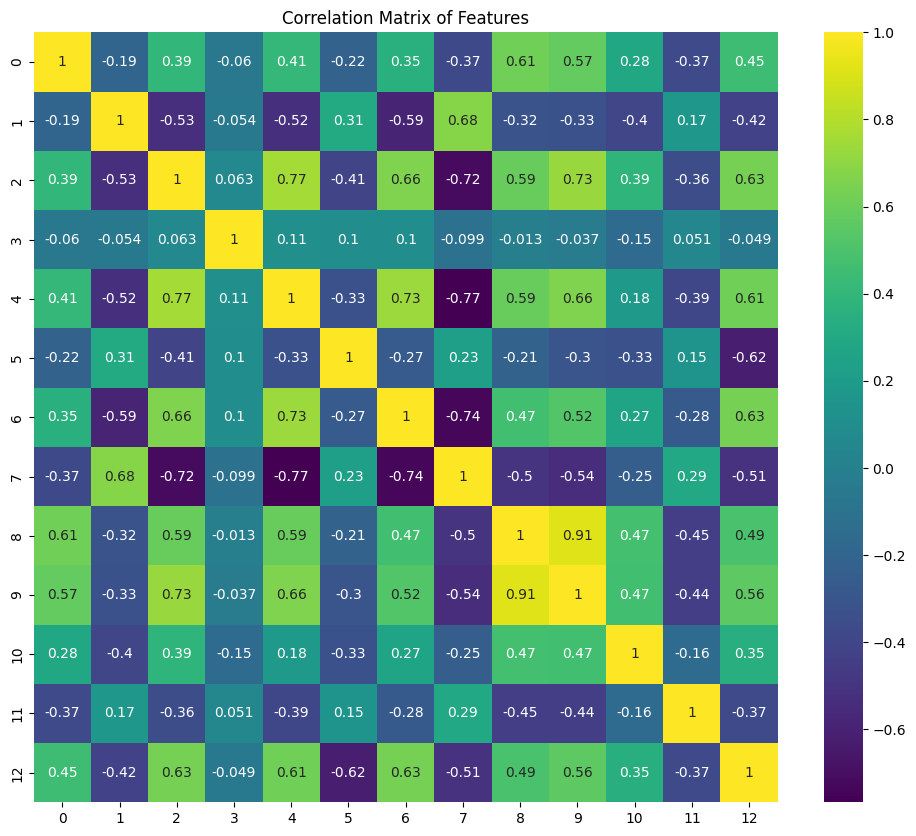

In [18]:

plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(x_train).corr(), annot=True, cmap='viridis')
plt.title("Correlation Matrix of Features")
plt.show()


In [19]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [20]:
regression_metrics_display(y_test, y_pred)

MAE is 4.950322962742226
MSE is 37.93148558838359
R2 score is 0.4672694679721452
